**Introduction**

---


The first project set forward for AMAT 585 is an examination of the 26 letter, latin alphabet using using the concepts of persistent homology. Persistent homology is defined as a computational method for topological features in a given space. Often this method is used in conjuction with persistent filtrations of 0-homology to determine underlying characteristic of a data set.

The code shown below is the foundational basis for this project as it allows several key repositories to be accessed.

In [ ]:
!pip install ripser
!pip install persim

import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import PIL

from persim import plot_diagrams
from ripser import ripser, lower_star_img

import csv

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
from numpy import genfromtxt

In [ ]:
#!git clone https://github.com/BorisGoldfarb/Letters.git

Cloning into 'Letters'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


The code shown below is a test/example of the data used for this project. As shown, the second entry "B" is called from the github repository in its base form. This base form is in the notation of a single array of 100 entries whose values were determined, by hand, from the class. Each entry in this base array is either 0 or 1 depending on how the letter fell while overlapping a 10x10 grid. 

Once the base array for an individual letter is called, the below code will translate the positional data of the 1's to a number corresponding the to column is it placed in while translating each of the 0's to an astronomically high number (in this case 100). This will create a stark contrast in the graph as well as allow for distinct persistent filtrations to be created. 

A third set of code is show below in an attempt to read the diagonals, and offsets, of the newly created array. This will become more relevant later in the documentation. 

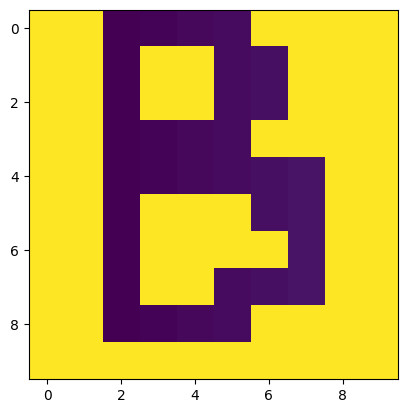

(10, 10)
[[100 100   3   4   5   6 100 100 100 100]
 [100 100   3 100 100   6   7 100 100 100]
 [100 100   3 100 100   6   7 100 100 100]
 [100 100   3   4   5   6 100 100 100 100]
 [100 100   3   4   5   6   7   8 100 100]
 [100 100   3 100 100 100   7   8 100 100]
 [100 100   3 100 100 100 100   8 100 100]
 [100 100   3 100 100   6   7   8 100 100]
 [100 100   3   4   5   6 100 100 100 100]
 [100 100 100 100 100 100 100 100 100 100]]
[100 100 100   7 100 100 100   3 100 100]


In [ ]:
letters = genfromtxt('letters.csv', delimiter = ',')
#for i in range(25):
letter_one_line = letters[1,:]
letter = np.full((10,10),100)
for k in range(1,101):
    if letter_one_line[k] == 1.0:
      row = int((k-1)/10)
      column = ((k-1)%10)
      letter[row,column] = k%10
plt.imshow(letter)
plt.show()
print(letter.shape)
print(letter)

a = np.fliplr(letter).diagonal(offset=(9-10))
b= np.fliplr(letter).diagonal(offset=9)
c = np.concatenate((a,b))
print(c)

#plt.imshow(letter)
#plt.show()

In [ ]:
dgmPLR = [None]*26
for i in range(26):
    letter_one_line = letters[i,:]
    letter = np.full((10,10),100)
    for k in range(1,101):
      if letter_one_line[k]==1.0:
        row = int((k-1)/10)
        column = (k-1)%10
        letter[row,column]=max(9-(k-1)%10,9-int((k-1)/10))
    dgmPLR[i] = lower_star_img(letter)



print(dgmPLR[0:25])

[array([[ 2., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 5.,  7.],
       [ 2., inf]]), array([[ 5., inf]]), array([[ 3., inf]]), array([[ 3., inf]]), array([[ 4., inf]]), array([[ 4., inf]]), array([[ 3., inf]]), array([[ 3., inf]]), array([[ 5.,  7.],
       [ 2., inf]]), array([[ 3., inf]]), array([[ 7.,  8.],
       [ 2., inf]]), array([[ 4., inf]]), array([[ 7.,  8.],
       [ 2., inf]]), array([[ 3., inf]]), array([[ 2., inf]]), array([[ 5., inf]]), array([[ 2., inf]]), array([[ 4., inf]]), array([[ 5.,  6.],
       [ 2., inf]]), array([[ 3., inf]]), array([[ 4., inf]])]


**First Attempt**

---

Using the example provided above as a starting point, a first attempt was made with the ripser lower_star_image function in conjuction with a newly arranged matrix titled dgmPLR. This name was left out of convience for the retrofitted code but varies from the cell above. The intention of the below code is to scan each letter's matrix from the lower right corner, moving to the upper left corncer along the antidiagonal. This scan would read the antidiagonals into a new matrix while pairing the -9th offset with the +1st offset; -8th with the +2nd; so on and so forth allowing the creation of a new 10x10 matrix to be fed into the lower_star_image function. 

In [ ]:
dgmPLR = [None]*26
for i in range(26):
    letter_one_line = letters[i,:]
    letter = np.full((10,10),100)
    for k in range(1,101):
      if letter_one_line[k]==1.0:
        row = int((k-1)/10)
        column = (k-1)%10
        letter[row,column]=max(9-(k-1)%10,9-int((k-1)/10))
    #letter_new = [None]*10
    for x in range(-9,10):
        print(letter)
        print(x)
        if x == 0:
          letter_new = np.vstack([letter_new, np.fliplr(letter).diagonal(offset= x)])
          #print(letter_new)
        if x > 0:
          a = np.fliplr(letter).diagonal(offset=x)
          b = np.fliplr(letter).diagonal(offset=(x-10))
          letter_new = np.vstack([letter_new,np.concatenate((a,b))])
          #print(letter_new)
        else:
          a = np.fliplr(letter).diagonal(offset=x)
          b = np.fliplr(letter).diagonal(offset=(x+10))
          if x == -9:
              letter_new = np.concatenate((a,b))
          else:
              letter_new = np.vstack([letter_new,np.concatenate((a,b))])
          #print(letter_new)
    #letter_new = np.delete(letter_new, 0)
    print(letter_new, len(letter_new))
    dgmPLR[i] = lower_star_img(letter_new)



print(dgmPLR)

 [100 100 100 100   6 100 100 100 100 100]
 [100 100 100 100   7 100 100 100 100 100]
 [100 100 100   7 100 100 100 100 100 100]
 [100 100   7 100 100 100 100 100 100 100]
 [100 100   8 100 100 100 100 100 100 100]
 [100   8 100 100 100 100 100   4   5 100]
 [100 100 100 100 100   4   4   5 100 100]
 [100 100 100 100   5   4   5 100 100 100]] 20
[[100 100 100 100 100 100 100 100 100 100]
 [100   8 100 100 100   8 100 100   8 100]
 [100   8 100 100   7   7 100 100   7 100]
 [100   8   7 100   6   6   6 100   6 100]
 [100 100   7 100   5 100   5 100   5 100]
 [100 100   7   6   5 100   4   4   4 100]
 [100 100 100   6   5 100   3   3   3 100]
 [100 100 100   6 100 100 100   2 100 100]
 [100 100 100   6 100 100 100   2 100 100]
 [100 100 100 100 100 100 100 100 100 100]]
-9
[[100 100 100 100 100 100 100 100 100 100]
 [100   8 100 100 100   8 100 100   8 100]
 [100   8 100 100   7   7 100 100   7 100]
 [100   8   7 100   6   6   6 100   6 100]
 [100 100   7 100   5 100   5 100   5 100]
 [1

In [ ]:
type(dgmPLR[0][0][0])

numpy.float64

The result produced by the lower_star_image function is then cleaned/scrubbed using the following methodalogy:

1. "nan" entries are replaced with a 0 value
2. "inf" entries are replaced with a 100 value
3. A distance is calculated between the pair-wise values of the array. If the distance is 100 then the entry is dropped as it would translate to "nan" and "inf".




In [ ]:
mtx = [None]*26

for x in range(len(dgmPLR)):
  tempV = [None]*len(dgmPLR[x])
  for y in range(len(dgmPLR[x])):
    if np.isnan(dgmPLR[x][y][0]) == True: #replace nan with 0
      dgmPLR[x][y][0] = 0
    if np.isinf(dgmPLR[x][y][1]) == True: #replace inf with 100
      dgmPLR[x][y][1] = 100
    if dgmPLR[x][y][1]-dgmPLR[x][y][0] != 100: #remove nan,inf entries
      tempV[y] = dgmPLR[x][y][1]-dgmPLR[x][y][0]
  tempV = [n for n in tempV if n is not None] #remove None entries from temp array
  mtx[x] = tempV

print(mtx)

TypeError: object of type 'NoneType' has no len()

Once the results have been scrubbed, the newly formed array of distances is verifed for repeat values/entries.

As shown below, this current scanning method produced 4 unique pairs of letters with identical distance vectors: 
- A & S
- E & M
- G & H
- O & Q

In [ ]:
count = 0
alphabet = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
for a in range(len(mtx)):
  for b in range(len(mtx)):
    if mtx[a] == mtx[b] and a != b:
      print("Entry "+str(a)+alphabet[a]+" is the same as entry "+str(b)+alphabet[b])
      print(mtx[a], mtx[b])
      count += 1
print(int(count/2))


Entry 0a is the same as entry 18s
[98.0, 94.0, 98.0] [98.0, 94.0, 98.0]
Entry 4e is the same as entry 12m
[2.0, 95.0, 98.0, 95.0, 98.0] [2.0, 95.0, 98.0, 95.0, 98.0]
Entry 6g is the same as entry 7h
[97.0, 94.0, 97.0] [97.0, 94.0, 97.0]
Entry 7h is the same as entry 6g
[97.0, 94.0, 97.0] [97.0, 94.0, 97.0]
Entry 12m is the same as entry 4e
[2.0, 95.0, 98.0, 95.0, 98.0] [2.0, 95.0, 98.0, 95.0, 98.0]
Entry 14o is the same as entry 16q
[1.0, 1.0, 98.0, 93.0, 98.0] [1.0, 1.0, 98.0, 93.0, 98.0]
Entry 16q is the same as entry 14o
[1.0, 1.0, 98.0, 93.0, 98.0] [1.0, 1.0, 98.0, 93.0, 98.0]
Entry 18s is the same as entry 0a
[98.0, 94.0, 98.0] [98.0, 94.0, 98.0]
4


In [ ]:
# Entry 0 A is the same as entry 18 S
# [98.0, 94.0, 98.0] [98.0, 94.0, 98.0]
# Entry 4 E is the same as entry 12 M
# [2.0, 95.0, 98.0, 95.0, 98.0] [2.0, 95.0, 98.0, 95.0, 98.0]
# Entry 6 G is the same as entry 7 H
# [97.0, 94.0, 97.0] [97.0, 94.0, 97.0]
# Entry 14 O is the same as entry 16 Q
# [1.0, 1.0, 98.0, 93.0, 98.0] [1.0, 1.0, 98.0, 93.0, 98.0]

Using basic reasoning, it is possible to hypothesize why 3 of the 4 the above mentioned pairings have identical distance vectors. Starting with O & Q; the similar nature of each letter was bound to cause issue with the lower_star_image function as the only difference was a minor 'blip' on the bottom section of the letter Q. This could easily have been identified as noise and therefore dismissed. 

Recall that this method of scanning traverses the anti-diagonal of the orginally data and pairs complementary offets with each other. This method of scanning will have cause some letters to appear identicial if a 90$^\circ$ rotation the letter may cause them to be similar. This may have been the case with E & M. 

Finally, after deliberation, a conclusion for the similarities for G & H have resulted in an understanding of the center bar present in each letter. 

There is no current hypothesis of the similaries of A & S. 

**Second Attempt**

---

A second attempt was made in light of the 4 similarities of the first attempt. This attempt looked to continue the diagonal scanning technique but with two major changes: 
- The scan will start from the lower left of a letter's base matrix and proceed to the upper right corner. 
- The scan will read along the main diagonal and its offsets. 

Most of the code is similar between the two attempts with changes only made to the scan/read orientation. 


In [ ]:

dgmLL = [None]*26
for i in range(26):
    letter_one_line = letters[i,:]
    letter = np.full((10,10),100)
    for k in range(1,101):
      if letter_one_line[k]==1.0:
        row = int((k-1)/10)
        column = (k-1)%10
        letter[row,column]=max(9-(k-1)%10,9-int((k-1)/10))
    letter_new = [None]*10
    for x in range(-9,10):
        if x == 0:
          letter_new = np.vstack([letter_new, letter.diagonal(offset= x)])
        if x > 0:
          a = letter.diagonal(offset=x)
          b = letter.diagonal(offset=(x-10))
          letter_new = np.vstack([letter_new,np.concatenate((a,b))])
        else:
          a = letter.diagonal(offset=x)
          b = letter.diagonal(offset=(x+10))
          letter_new = np.vstack([letter_new,np.concatenate((a,b))])

    dgmLL[i] = lower_star_img(letter_new)

print(dgmLL)

ValueError: object dtype is not supported by sparse matrices

In [ ]:
mtx2 = [None]*26

for x in range(len(dgmLL)):
  tempV = [None]*len(dgmLL[x])
  for y in range(len(dgmLL[x])):
    if np.isnan(dgmLL[x][y][0]) == True: #replace nan with 0
      dgmLL[x][y][0] = 0
    if np.isinf(dgmLL[x][y][1]) == True: #replace inf with 100
      dgmLL[x][y][1] = 100
    if dgmLL[x][y][1]-dgmLL[x][y][0] != 100: #remove nan,inf entries
      tempV[y] = dgmLL[x][y][1]-dgmLL[x][y][0]
  tempV = [n for n in tempV if n is not None] #remove None entries from temp array
  mtx2[x] = tempV

print(mtx)

[[98.0, 94.0, 98.0], [4.0, 98.0, 98.0], [98.0, 93.0, 98.0], [1.0, 98.0, 93.0, 98.0], [2.0, 95.0, 98.0, 95.0, 98.0], [93.0, 95.0, 95.0, 95.0], [97.0, 94.0, 97.0], [97.0, 94.0, 97.0], [96.0, 95.0, 96.0], [96.0, 94.0, 96.0], [93.0, 97.0, 94.0, 97.0], [97.0, 93.0, 97.0], [2.0, 95.0, 98.0, 95.0, 98.0], [1.0, 97.0, 95.0, 93.0, 97.0], [1.0, 1.0, 98.0, 93.0, 98.0], [1.0, 93.0, 96.0, 94.0, 96.0], [1.0, 1.0, 98.0, 93.0, 98.0], [93.0, 97.0, 95.0, 97.0], [98.0, 94.0, 98.0], [95.0, 95.0, 95.0], [98.0, 93.0, 92.0, 98.0], [96.0, 94.0, 93.0, 96.0], [1.0, 98.0, 95.0, 98.0], [97.0, 95.0, 97.0], [96.0, 94.0, 94.0, 96.0], [1.0, 1.0, 98.0, 95.0, 98.0]]


In [ ]:
count = 0
alphabet = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
for a in range(len(mtx2)):
  for b in range(len(mtx2)):
    if mtx2[a] == mtx2[b] and a != b:
      print("Entry "+str(a)+alphabet[a]+" is the same as entry "+str(b)+alphabet[b])
      print(mtx2[a], mtx2[b])
      count += 1
print(int(count/2))

0


In [ ]:
print(mtx2[0]) #secondary test based on first attempt / 'A' vector compared to 'S' vector
print(mtx2[18])

[95.0, 98.0, 96.0, 98.0]
[95.0, 98.0, 92.0, 97.0, 98.0]


In [ ]:
print(mtx2[4]) #E
print(mtx2[12]) #M

[1.0, 2.0, 98.0, 92.0, 95.0, 98.0]
[2.0, 95.0, 97.0, 92.0, 98.0]


In [ ]:
print(mtx2[6]) #G
print(mtx2[7]) #H

[2.0, 97.0, 92.0, 96.0, 97.0]
[93.0, 97.0, 96.0, 92.0, 97.0]


In [ ]:
print(mtx2[14]) #O
print(mtx2[16]) #Q

[1.0, 97.0, 97.0, 98.0]
[1.0, 98.0, 97.0, 98.0]


After following the same steps put forward by the first attempt, it can be noted that no two letters have identical distance vectors. The 4 problem pairs discovered in the first attempt have been rectified/verified as unique and is therefore considered a complete classification. It is important to note that the distance vectors of O & Q are different by 1 unit (as shown above). 



**Improvements & Critisims**

---

Given the simplicity of this complete classification, it may be susceptible to a less clean data set. That is, given a more noisy and interrupted base data set, a complete classification of the letters may require a more robust scanning method. A proposition was placed forward to create a 1-homology filtration along side of the 0-homology solution to better differentiate the the distance vectors. 

Given more time to improve upon this project, a 1-homology solution may emerge (though it is not naturally a part of the ripser repository). This solution, paired with the current classification would allow a filter to be placed on letters containing a 1-homology allowing for a better seperation/distinction while becoming less susceptible to noisier data sets. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c3975852-3619-4f95-970c-90c02f1f882d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>